In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve , recall_score, precision_score,f1_score, precision_recall_curve, classification_report,mean_squared_error
from tabulate import tabulate
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [30]:
df = pd.read_csv("D:\heart problem\heart data set\heart.csv")

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [32]:
Y= df["target"]
X= df.drop(["target"],axis=1)

In [33]:
pd.isnull(df).sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# check variance
print('\n*** Variance In Columns ***')
print(df.var())

# check std dev 
print('\n*** Standard Deviation In Columns ***')
print(df.std())


*** Variance In Columns ***
age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64

*** Standard Deviation In Columns ***
age          9.072290
sex          0.460373
cp           1.029641
trestbps    17.516718
chol        51.592510
fbs          0.356527
restecg      0.527878
thalach     23.005724
exang        0.472772
oldpeak      1.175053
slope        0.617755
ca           1.030798
thal         0.620660
target       0.500070
dtype: float64



*** Histogram Plot ***


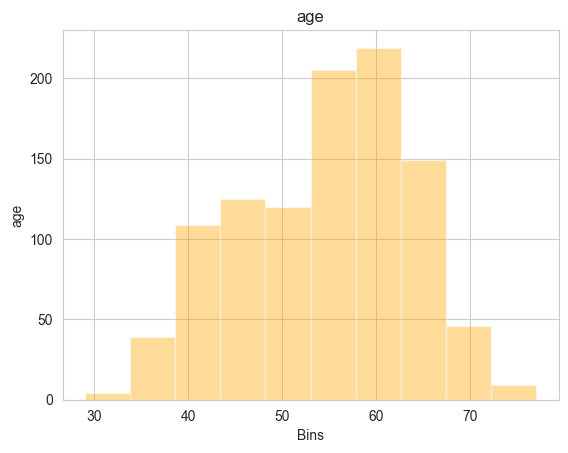

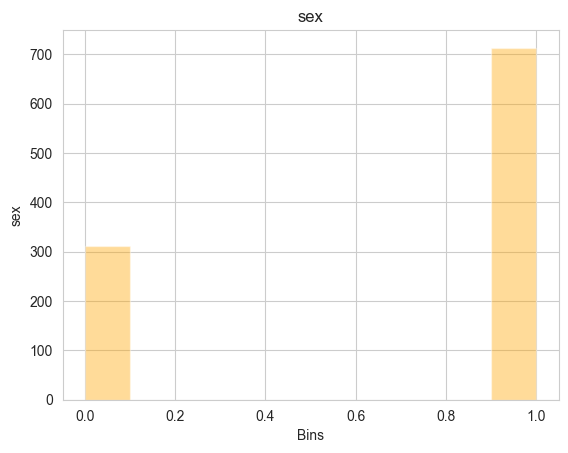

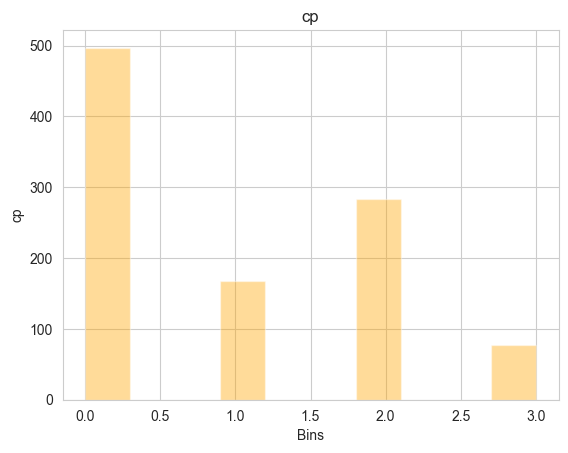

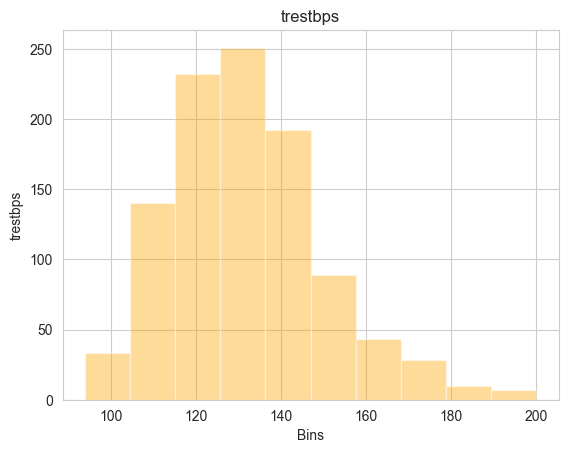

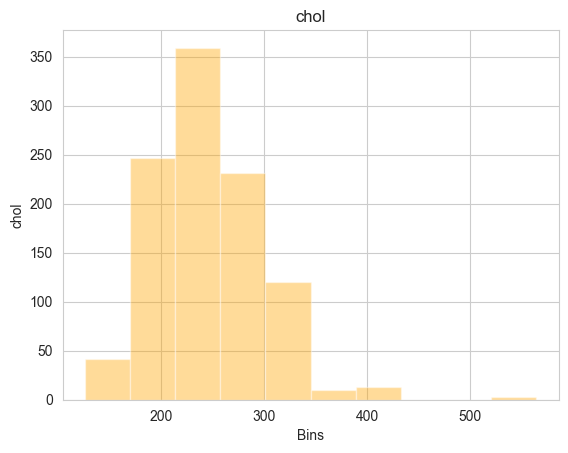

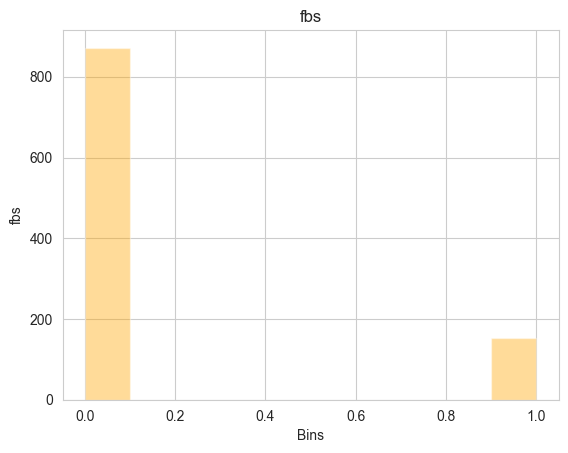

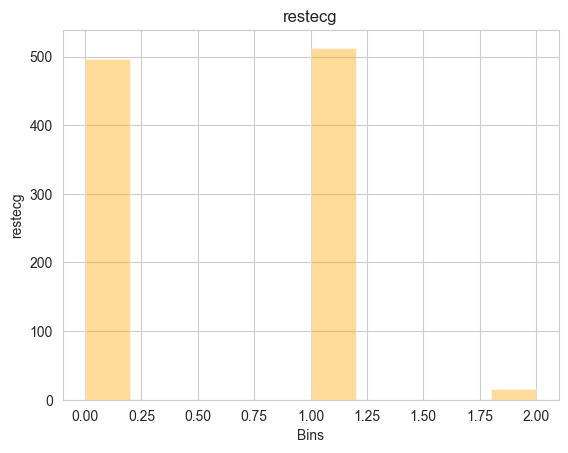

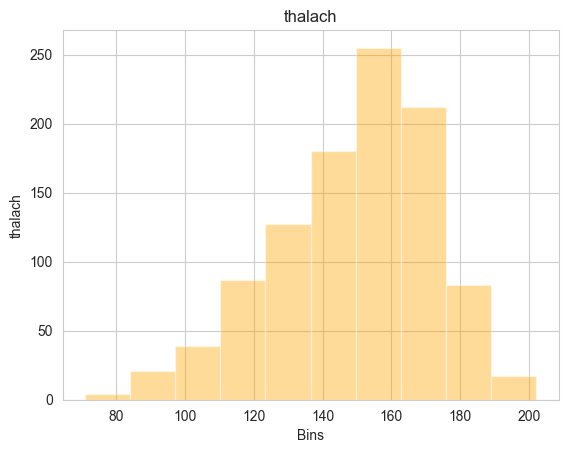

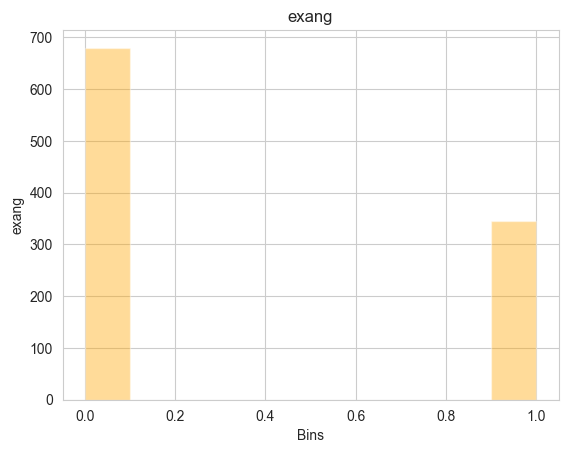

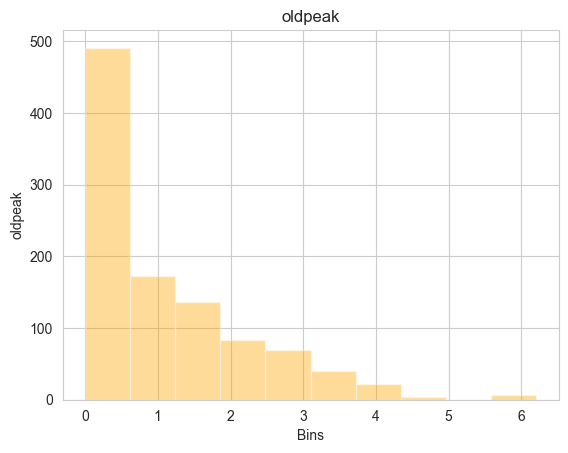

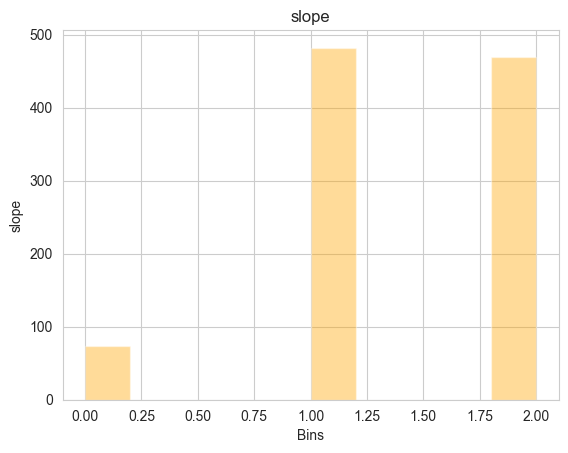

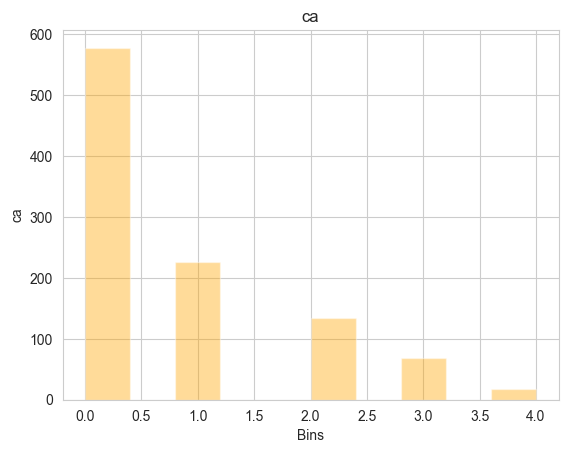

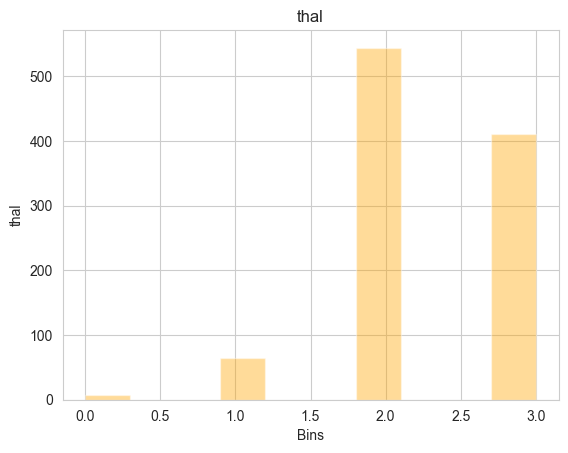

In [35]:
print("\n*** Histogram Plot ***")
colNames = df.columns.tolist()
colNames.remove("target")
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.distplot(colValues, bins=10, kde=False, color='orange')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()


*** Group Counts ***
target
0    499
1    526
dtype: int64


*** By Bar Chart ***


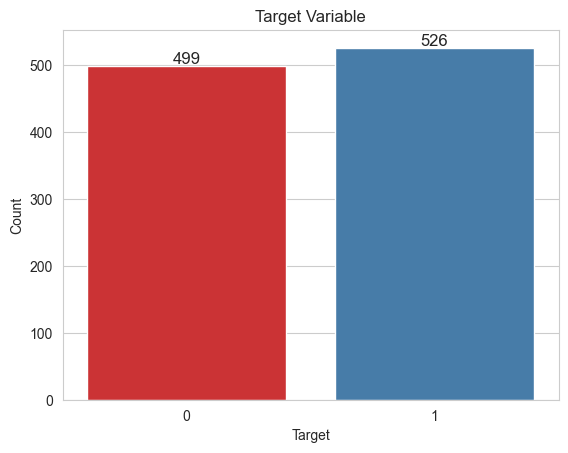

In [36]:
# check class
# outcome groupby count  
# Group counts
print("\n*** Group Counts ***")
group_counts = df.groupby("target").size()
print(group_counts)
print("")

# Bar chart
print("\n*** By Bar Chart ***")
plt.figure()
ax = sns.countplot(x="target", data=df, palette="Set1")
plt.title('Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')

# Add count labels inside each bar
for p, count in zip(ax.patches, group_counts):
    ax.annotate(count, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

plt.show()

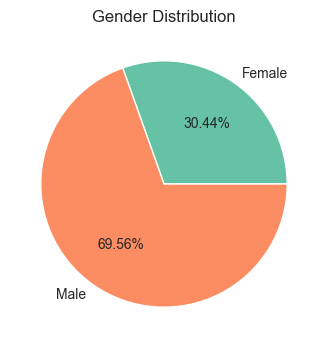

In [53]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])

# Calculate percentages
total_count = len(df)
percentage_female = countFemale / total_count * 100
percentage_male = countMale / total_count * 100

# Create labels and sizes for the pie chart
labels = ['Female', 'Male']
sizes = [percentage_female, percentage_male]

# Define color palette
colors = sns.color_palette('Set2')

# Create pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%.2f%%', colors=colors)
plt.title('Gender Distribution')
plt.show()

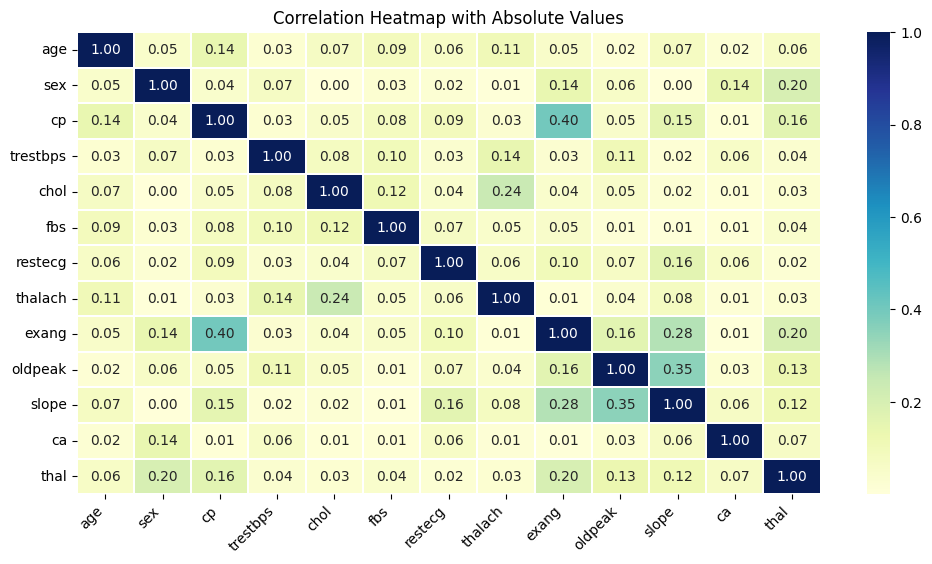

In [10]:
# Correlation  using heatmap with absolute values
plt.figure(figsize=(12, 6))
df = df.drop(['target'], axis=1)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr().abs()  # Convert negative values to positive
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.2)

# Customize the tick labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.title('Correlation Heatmap with Absolute Values')
plt.show()

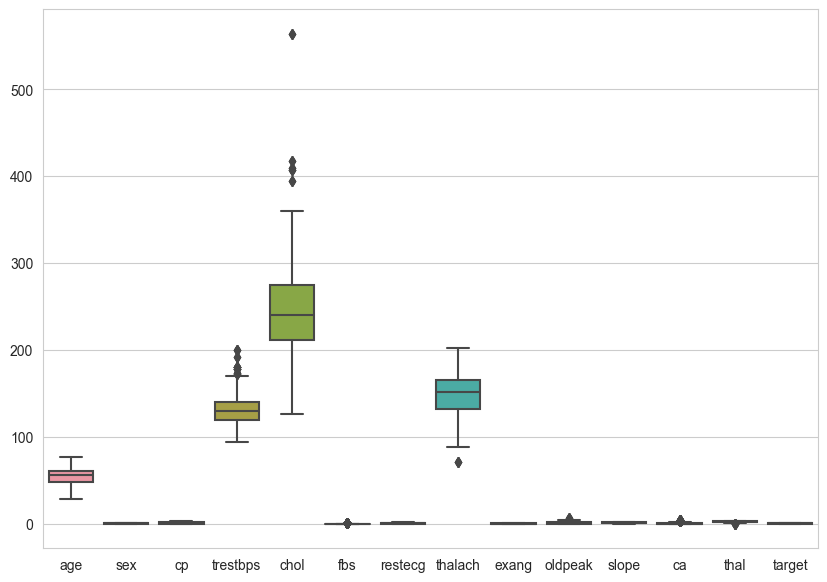

In [38]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df)
plt.show()

In [39]:
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size=0.2, random_state = 0)


*** Train & Test Data ***
X_train shape: (820, 13)
Y_train shape: (820,)
X_test shape: (205, 13)
Y_test shape: (205,)


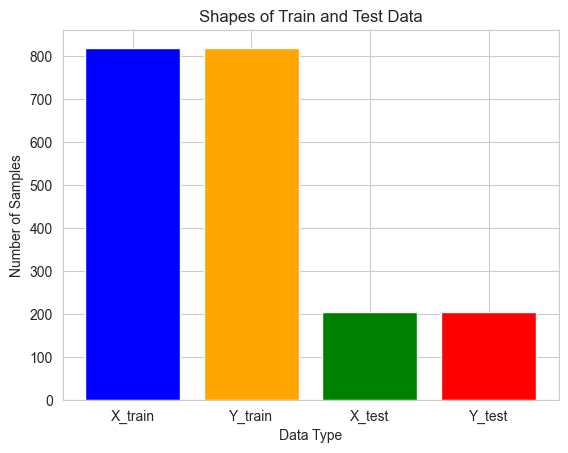

In [40]:
# Print the shapes
print("\n*** Train & Test Data ***")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

# Bar chart of data shapes
data_shapes = [X_train.shape[0], Y_train.shape[0], X_test.shape[0], Y_test.shape[0]]
labels = ['X_train', 'Y_train', 'X_test', 'Y_test']
colors = ['blue', 'orange', 'green', 'red']

plt.figure()
plt.bar(labels, data_shapes, color=colors)
plt.title('Shapes of Train and Test Data')
plt.xlabel('Data Type')
plt.ylabel('Number of Samples')
plt.show()

In [41]:
print("\n*** class instance variable ***")
print(X.shape)
print(Y.shape)
print(type(X))
print(type(Y))


*** class instance variable ***
(1025, 13)
(1025,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>



*** Frequency of unique values of Train Data ***
[[  0   1]
 [401 419]]


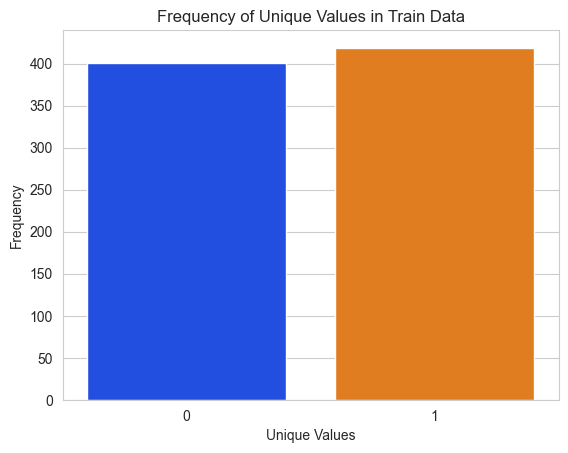

In [42]:
unique_elements, counts_elements = np.unique(Y_train, return_counts=True)

print("\n*** Frequency of unique values of Train Data ***")
print(np.asarray((unique_elements, counts_elements)))

# Bar chart of frequency of unique values
plt.figure()
sns.barplot(x=unique_elements, y=counts_elements, palette="bright")
plt.title('Frequency of Unique Values in Train Data')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.show()

In [43]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, Y_train)
pred_lr = model.predict(X_test)
pred_value = model.predict(X_test)
label_pred = pred_value
print(classification_report(Y_test, label_pred))


              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [44]:
# Multi-Layer Perceptron Model
ann = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam')
ann.fit(X_train, Y_train)
pred_ann = ann.predict(X_test)
pred_value = ann.predict(X_test)
label_pred = pred_value
print(classification_report(Y_test, label_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        98
           1       0.87      0.78      0.82       107

    accuracy                           0.82       205
   macro avg       0.83      0.83      0.82       205
weighted avg       0.83      0.82      0.82       205



In [45]:
# Naive Bayes Model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)
pred_nb = naive_bayes.predict(X_test)
pred_value = naive_bayes.predict(X_test)
label_pred = pred_value
print(classification_report(Y_test, label_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [46]:
# K Nearest Neighbors Model
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred_knn = knn.predict(X_test)
pred_value = knn.predict(X_test)
label_pred = pred_value
print(classification_report(Y_test, label_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        98
           1       0.77      0.74      0.75       107

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205



In [47]:
# Gradient Boosting Model
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
pred_gbc = gbc.predict(X_test)
pred_value = gbc.predict(X_test)
label_pred = pred_value
print(classification_report(Y_test, label_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        98
           1       0.98      1.00      0.99       107

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [48]:
# Support Vector Classifier
rbf = SVC(kernel='rbf')
rbf.fit(X_train, Y_train)
pred_svm = rbf.predict(X_test)
pred_value = rbf.predict(X_test)
label_pred = pred_value
print(classification_report(Y_test, label_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72        98
           1       0.73      0.81      0.77       107

    accuracy                           0.75       205
   macro avg       0.75      0.74      0.74       205
weighted avg       0.75      0.75      0.74       205



In [49]:
# Display confusion matrices in table form
models = ['Logistic Regression', 'Multi-Layer Perceptron', 'Naive Bayes', 'K Nearest Neighbors', 'Gradient Boosting', 'Support Vector Classifier']
predictions = [pred_lr, pred_ann, pred_nb, pred_knn, pred_gbc, pred_svm]

confusion_matrices = []
for model, pred in zip(models, predictions):
    cm = confusion_matrix(Y_test, pred)
    confusion_matrices.append(cm)

# Display confusion matrices in table form
table_data = []
for model, cm in zip(models, confusion_matrices):
    table_data.append([model, cm[0][0], cm[0][1], cm[1][0], cm[1][1]])

headers = ["Model", "True Negative", "False Positive", "False Negative", "True Positive"]
table = tabulate(table_data, headers=headers, tablefmt="fancy_grid")

print("Confusion Matrices:")
print(table)
print()

# Export confusion matrices as CSV
df_confusion_matrices = pd.DataFrame(table_data, columns=headers)
df_confusion_matrices.to_csv("confusion_matrices.csv", index=False)

Confusion Matrices:
╒═══════════════════════════╤═════════════════╤══════════════════╤══════════════════╤═════════════════╕
│ Model                     │   True Negative │   False Positive │   False Negative │   True Positive │
╞═══════════════════════════╪═════════════════╪══════════════════╪══════════════════╪═════════════════╡
│ Logistic Regression       │              77 │               21 │                7 │             100 │
├───────────────────────────┼─────────────────┼──────────────────┼──────────────────┼─────────────────┤
│ Multi-Layer Perceptron    │              86 │               12 │               24 │              83 │
├───────────────────────────┼─────────────────┼──────────────────┼──────────────────┼─────────────────┤
│ Naive Bayes               │              79 │               19 │               11 │              96 │
├───────────────────────────┼─────────────────┼──────────────────┼──────────────────┼─────────────────┤
│ K Nearest Neighbors       │              7

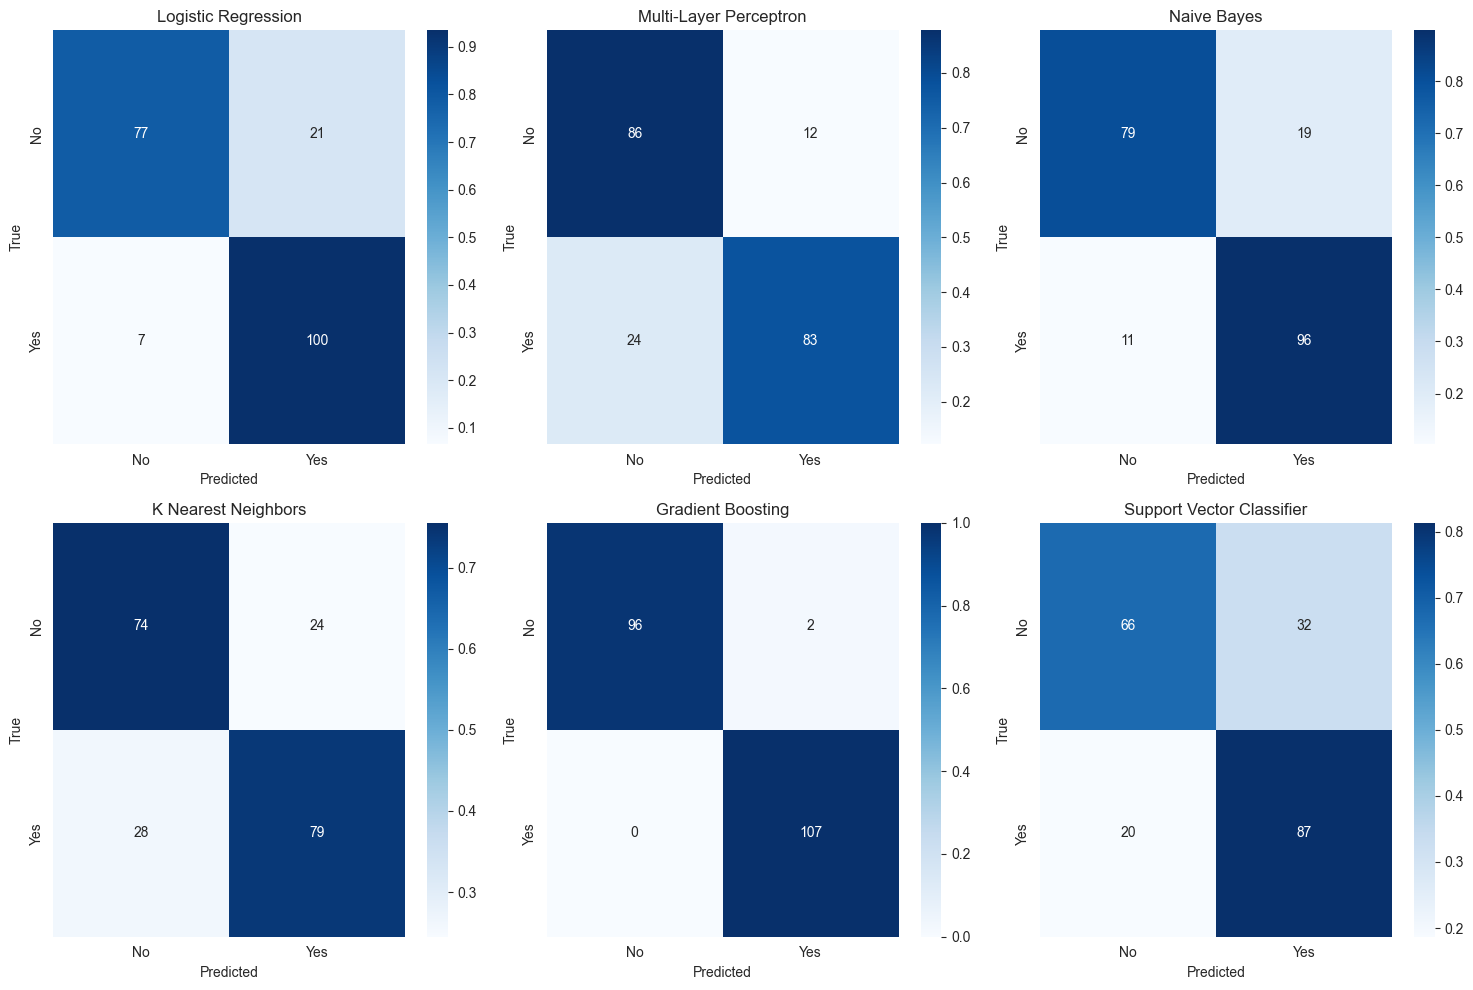

In [50]:
# Display confusion matrices in graphical form
plt.figure(figsize=(15, 10))

for i, (model, cm) in enumerate(zip(models, confusion_matrices)):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.subplot(2, 3, i + 1)
    sns.heatmap(cm_normalized, annot=cm, fmt='g', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(model)
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

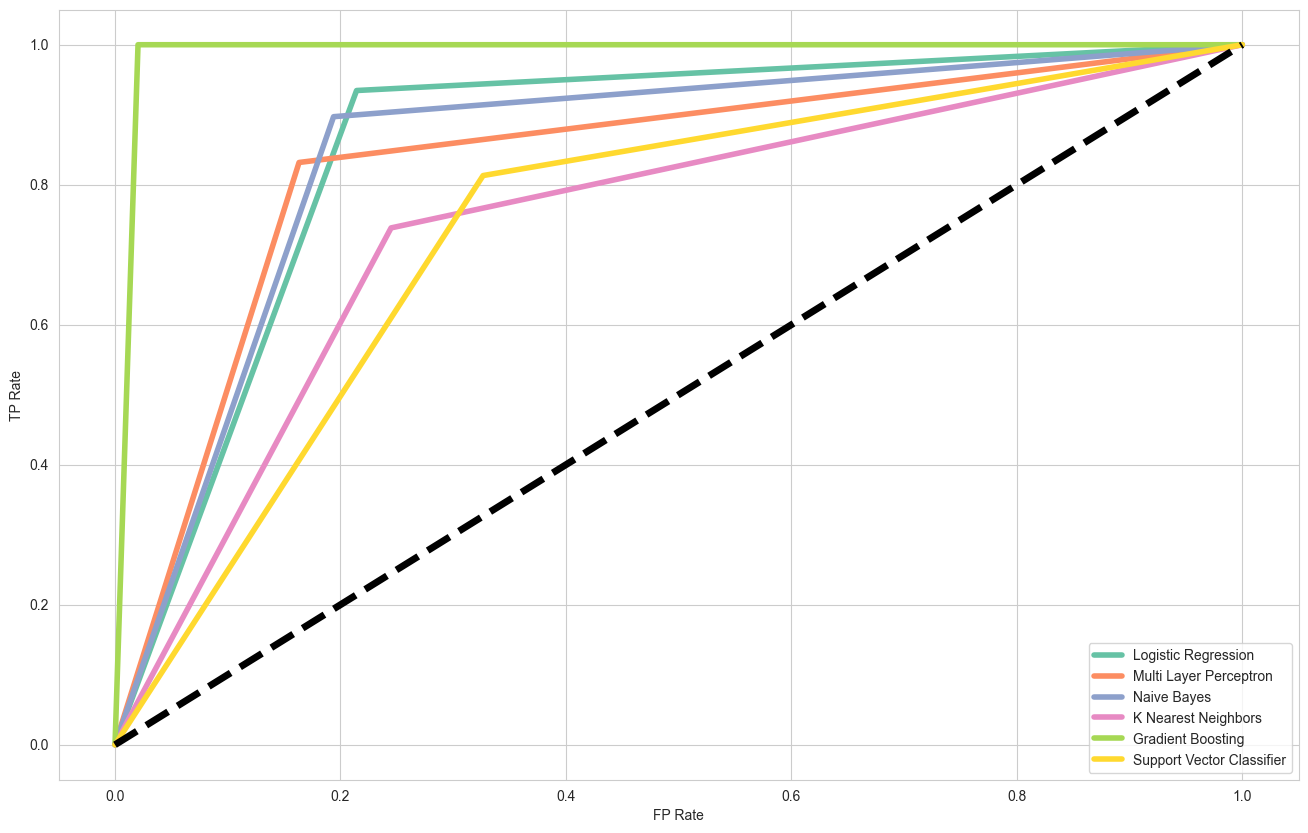

In [24]:
# ROC-AUC curve for Logistic Regression Model, Multi Layer Perceptron Model, Naive Bayes Model,K Nearest Neighbors Model, Gradient Boosting Model, Support Vector Classifier

lr_fpr, lr_tpr, lr_threshold = roc_curve(Y_test, pred_lr)
ann_fpr, ann_tpr, ann_threshold = roc_curve(Y_test, pred_ann)
nb_fpr, nb_tpr, nb_threshold = roc_curve(Y_test, pred_nb)
knn_fpr, knn_tpr, knn_threshold = roc_curve(Y_test, pred_knn)
gbc_fpr, gbc_tpr, gbc_threshold = roc_curve(Y_test, pred_gbc)
svm_fpr, svm_tpr, svm_threshold = roc_curve(Y_test, pred_svm)

sns.set_palette("Set2")
sns.set_style('whitegrid')

plt.figure(figsize=(16, 10))
plt.plot(lr_fpr, lr_tpr, label="Logistic Regression", linewidth=4)
plt.plot(ann_fpr, ann_tpr, label="Multi Layer Perceptron", linewidth=4)
plt.plot(nb_fpr, nb_tpr, label="Naive Bayes", linewidth=4)
plt.plot(knn_fpr, knn_tpr, label="K Nearest Neighbors", linewidth=4)
plt.plot(gbc_fpr, gbc_tpr, label="Gradient Boosting", linewidth=4)
plt.plot(svm_fpr, svm_tpr, label="Support Vector Classifier", linewidth=4)

x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='--', color="black", linewidth=5)

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.legend(loc=4)
plt.show()

In [25]:
#Accuracy, Precision, Recall, F1-score, Root Mean Square of Error
models = ['Logistic Regression', 'Multi-Layer Perceptron', 'Naive Bayes', 'K Nearest Neighbors', 'Gradient Boosting', 'Support Vector Classifier (RBF)']
predictions = [pred_lr, pred_ann, pred_nb, pred_knn, pred_gbc, pred_svm]
rmse_scores = []

for pred in predictions:
    rmse = np.sqrt(mean_squared_error(Y_test, pred))
    rmse_scores.append(rmse)

results = {
    'Model': models,
    'Accuracy (%)': [accuracy_score(Y_test, pred) * 100 for pred in predictions],
    'Precision (%)': [precision_score(Y_test, pred) * 100 for pred in predictions],
    'Recall (%)': [recall_score(Y_test, pred) * 100 for pred in predictions],
    'F1-Score (%)': [f1_score(Y_test, pred) * 100 for pred in predictions],
    'RMSE': rmse_scores
}

results_df = pd.DataFrame(results)
results_table = tabulate(results_df, headers='keys', tablefmt='fancy_grid')

print(results_table)


╒════╤═════════════════════════════════╤════════════════╤═════════════════╤══════════════╤════════════════╤══════════╕
│    │ Model                           │   Accuracy (%) │   Precision (%) │   Recall (%) │   F1-Score (%) │     RMSE │
╞════╪═════════════════════════════════╪════════════════╪═════════════════╪══════════════╪════════════════╪══════════╡
│  0 │ Logistic Regression             │        86.3415 │         82.6446 │      93.4579 │        87.7193 │ 0.369575 │
├────┼─────────────────────────────────┼────────────────┼─────────────────┼──────────────┼────────────────┼──────────┤
│  1 │ Multi-Layer Perceptron          │        83.4146 │         84.7619 │      83.1776 │        83.9623 │ 0.407251 │
├────┼─────────────────────────────────┼────────────────┼─────────────────┼──────────────┼────────────────┼──────────┤
│  2 │ Naive Bayes                     │        85.3659 │         83.4783 │      89.7196 │        86.4865 │ 0.382546 │
├────┼─────────────────────────────────┼────────

In [26]:
#
models = [LogisticRegression(), MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam'),
          GaussianNB(), KNeighborsClassifier(), GradientBoostingClassifier(), SVC(kernel='rbf')]
model_names = ['Logistic Regression', 'Multi-Layer Perceptron', 'Naive Bayes', 'K Nearest Neighbors',
               'Gradient Boosting', 'Support Vector Classifier (RBF)']

predictions = [pred_lr, pred_ann, pred_nb, pred_knn, pred_gbc, pred_svm]
rmse_scores = []

for pred in predictions:
    rmse = np.sqrt(mean_squared_error(Y_test, pred))
    rmse_scores.append(rmse)

kfold_val = KFold(n_splits=10)
kfold_accuracy = []
kfold_precision = []
kfold_recall = []
kfold_f1score = []

for model, model_name in zip(models, model_names):
    accuracy_scores = cross_val_score(model, X, Y, cv=kfold_val, scoring='accuracy')
    precision_scores = cross_val_score(model, X, Y, cv=kfold_val, scoring='precision_macro')
    recall_scores = cross_val_score(model, X, Y, cv=kfold_val, scoring='recall_macro')
    f1_scores = cross_val_score(model, X, Y, cv=kfold_val, scoring='f1_macro')
    kfold_accuracy.append(round(accuracy_scores.mean() * 100, 2))
    kfold_precision.append(round(precision_scores.mean() * 100, 2))
    kfold_recall.append(round(recall_scores.mean() * 100, 2))
    kfold_f1score.append(round(f1_scores.mean() * 100, 2))

results = {
    'Model': model_names,
    'Accuracy (%)': kfold_accuracy,
    'Precision (%)': kfold_precision,
    'Recall (%)': kfold_recall,
    'F1-Score (%)': kfold_f1score,
    'RMSE': rmse_scores
}

results_df = pd.DataFrame(results)
results_table = tabulate(results_df, headers='keys', tablefmt='fancy_grid')

print(results_table)


╒════╤═════════════════════════════════╤════════════════╤═════════════════╤══════════════╤════════════════╤══════════╕
│    │ Model                           │   Accuracy (%) │   Precision (%) │   Recall (%) │   F1-Score (%) │     RMSE │
╞════╪═════════════════════════════════╪════════════════╪═════════════════╪══════════════╪════════════════╪══════════╡
│  0 │ Logistic Regression             │          84.09 │           84.58 │        83.94 │          83.89 │ 0.369575 │
├────┼─────────────────────────────────┼────────────────┼─────────────────┼──────────────┼────────────────┼──────────┤
│  1 │ Multi-Layer Perceptron          │          83.5  │           83.96 │        83.21 │          83.92 │ 0.407251 │
├────┼─────────────────────────────────┼────────────────┼─────────────────┼──────────────┼────────────────┼──────────┤
│  2 │ Naive Bayes                     │          82.33 │           82.73 │        82.32 │          82.19 │ 0.382546 │
├────┼─────────────────────────────────┼────────

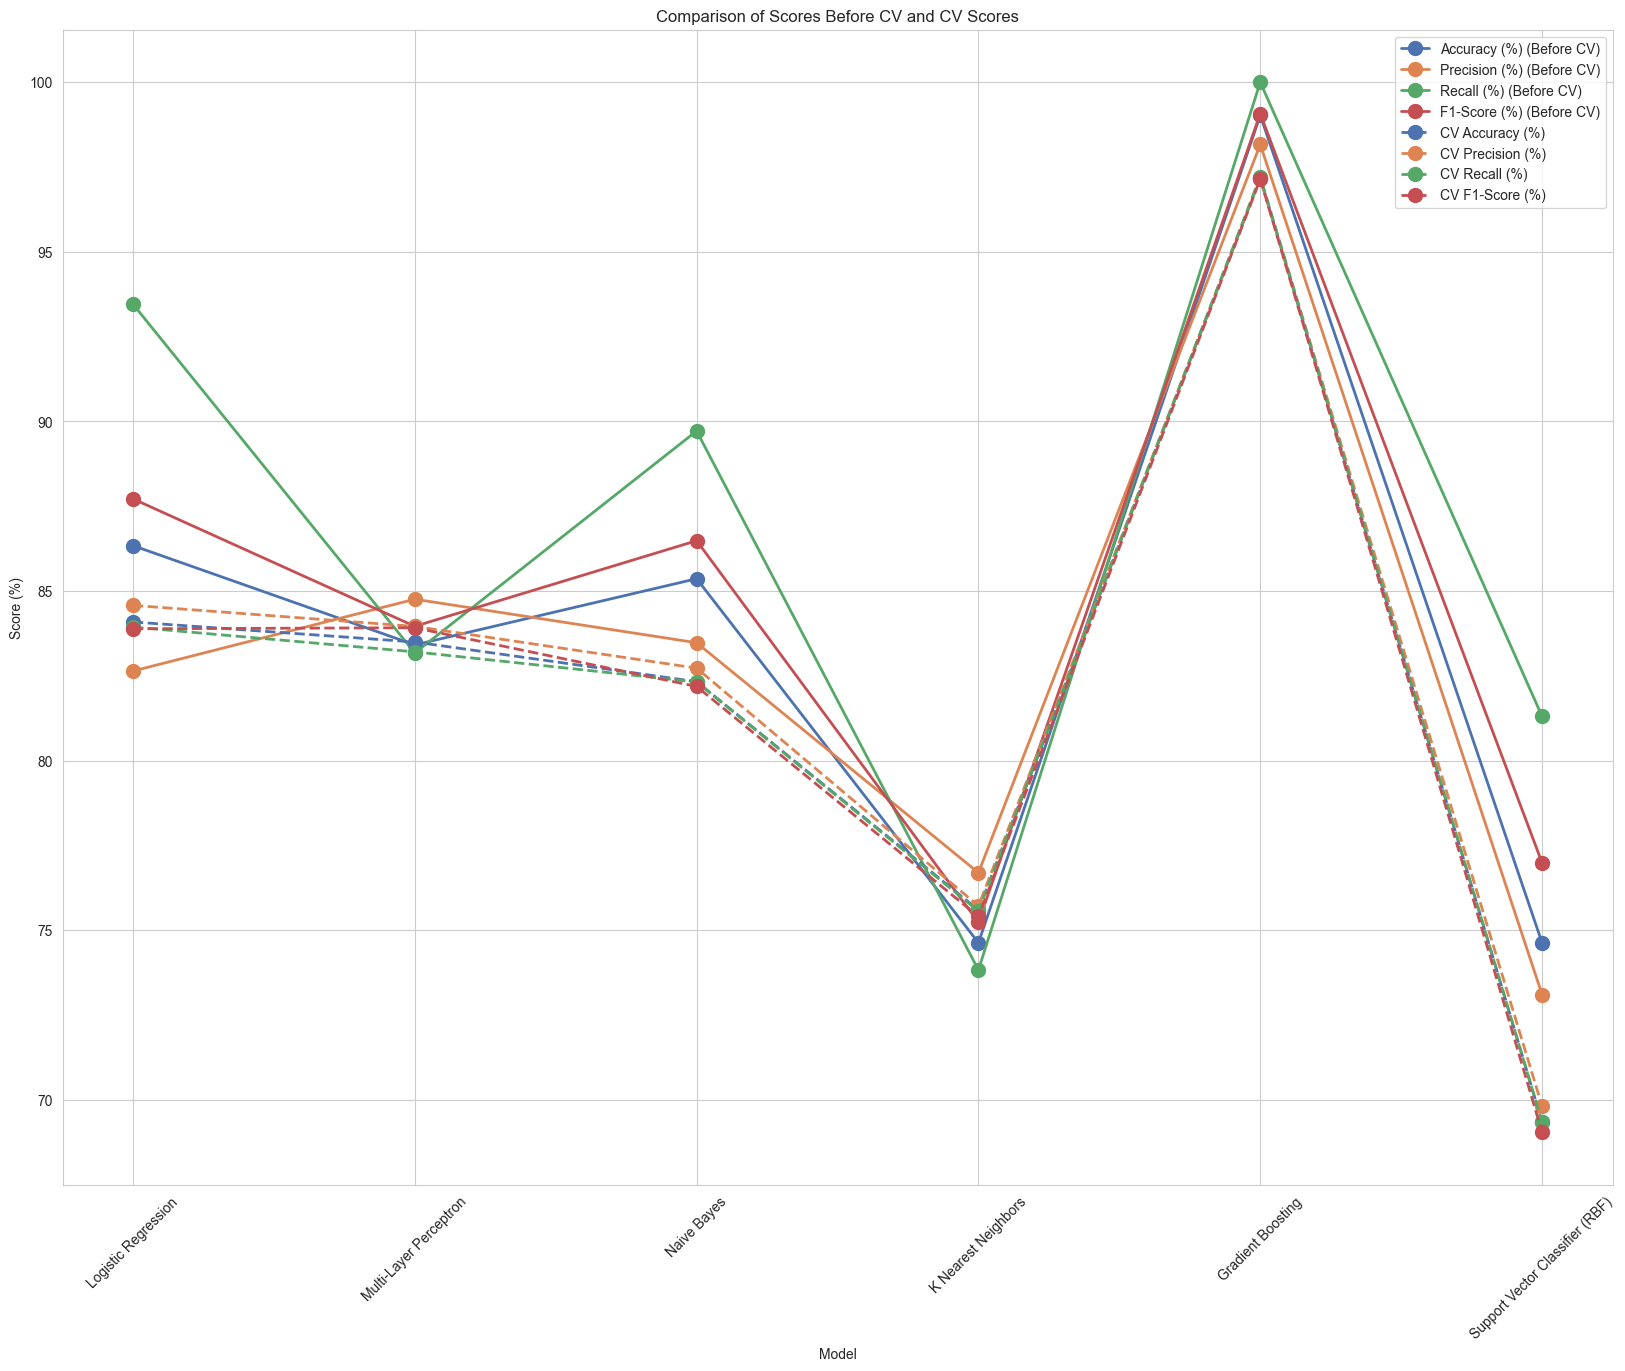

In [27]:
colors = sns.color_palette('deep')

models = ['Logistic Regression', 'Multi-Layer Perceptron', 'Naive Bayes', 'K Nearest Neighbors', 'Gradient Boosting', 'Support Vector Classifier (RBF)']
predictions = [pred_lr, pred_ann, pred_nb, pred_knn, pred_gbc, pred_svm]

results_before_cv = {
    'Model': models,
    'Accuracy (%)': [accuracy_score(Y_test, pred) * 100 for pred in predictions],
    'Precision (%)': [precision_score(Y_test, pred) * 100 for pred in predictions],
    'Recall (%)': [recall_score(Y_test, pred) * 100 for pred in predictions],
    'F1-Score (%)': [f1_score(Y_test, pred) * 100 for pred in predictions]
}

results_cv = {
    'Model': models,
    'CV Accuracy (%)': kfold_accuracy,
    'CV Precision (%)': kfold_precision,
    'CV Recall (%)': kfold_recall,
    'CV F1-Score (%)': kfold_f1score
}

results_before_cv_df = pd.DataFrame(results_before_cv)
results_cv_df = pd.DataFrame(results_cv)

plt.figure(figsize=(20, 15))

# Plot scores before cross-validation
for i, column in enumerate(results_before_cv_df.columns[1:]):
    plt.plot(results_before_cv_df['Model'], results_before_cv_df[column], marker='o', markersize=10, linewidth=2,
             linestyle='-', label=f'{column} (Before CV)', color=colors[i])

# Plot scores from cross-validation
for i, column in enumerate(results_cv_df.columns[1:]):
    plt.plot(results_cv_df['Model'], results_cv_df[column], marker='o', markersize=10, linewidth=2,
             linestyle='--', label=f'{column}', color=colors[i])

plt.xlabel('Model')
plt.ylabel('Score (%)')
plt.title('Comparison of Scores Before CV and CV Scores')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
